# Trabalho prático DAA

### Acidentes Rodoviários

Este dataset contém 5000 casos e 13 features :

- city_name
- magnitude_of_delay
- delay_in_seconds
- affected_roads
- record_date
- luminosity
- avg_temperature
- avg_atm_pressure
- avg_humidity
- avg_wind_speed
- avg_precipitation
- avg_rain
- incidents

Corresponde a um problema de classificação multípla, sendo o atributo target (a prever),
incidents (nível de gravidade de um acidente).
As classficações deste atributo podem ser:

- Very High
- High
- Medium
- Low
- Node

## Importar Bibliotecas

In [225]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the data

In [226]:
data = pd.read_csv('sbstpdaa2223/training_data.csv')
test = pd.read_csv('sbstpdaa2223/test_data.csv')

## Exploração dos dados

Vista básica do dataset inicial, para treino.

In [227]:
data.shape

(5000, 13)

Vista básica do dataset inicial, para teste.

In [228]:
test.shape

(1206, 12)

In [229]:
data.head()

city_name magnitude_of_delay  delay_in_seconds  \
0  Guimaraes          UNDEFINED                 0   
1  Guimaraes          UNDEFINED               385   
2  Guimaraes          UNDEFINED                69   
3  Guimaraes              MAJOR              2297   
4  Guimaraes          UNDEFINED                 0   

                                      affected_roads       record_date  \
0                                                  ,  2021-03-15 23:00   
1                                              N101,  2021-12-25 18:00   
2                                                  ,  2021-03-12 15:00   
3  N101,R206,N105,N101,N101,N101,N101,N101,N101,N...  2021-09-29 09:00   
4                          N101,N101,N101,N101,N101,  2021-06-13 11:00   

  luminosity  avg_temperature  avg_atm_pressure  avg_humidity  avg_wind_speed  \
0       DARK             12.0            1013.0          70.0             1.0   
1       DARK             12.0            1007.0          91.0             1.0   
2      LIGHT             14.0            1025.0          64.0             0.0   
3      LIGHT             15.0            1028.0          75.0             1.0   
4      LIGHT             27.0            1020.0          52.0             1.0   

   avg_precipitation   avg_rain  incidents  
0                0.0  Sem Chuva       None  
1                0.0  Sem Chuva       None  
2                0.0  Sem Chuva        Low  
3                0.0  Sem Chuva  Very_High  
4                0.0  Sem Chuva       High

In [230]:
data.nunique()

city_name                1
magnitude_of_delay       3
delay_in_seconds      1186
affected_roads         678
record_date           5000
luminosity               3
avg_temperature         35
avg_atm_pressure        36
avg_humidity            83
avg_wind_speed          11
avg_precipitation        1
avg_rain                 4
incidents                5
dtype: int64

## Missing Values

- É visível que o único atributo que tem valores "perdidos" ou null é o affected_roads(85 linhas - treino, 22- teste).

<AxesSubplot:>

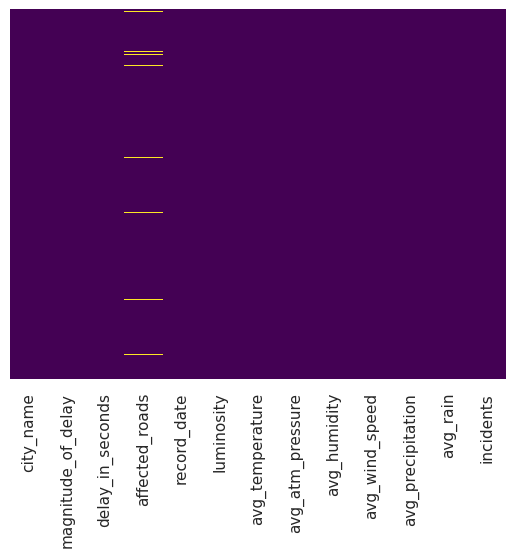

In [231]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False,cmap='viridis')

In [232]:
data.isna().any()

city_name             False
magnitude_of_delay    False
delay_in_seconds      False
affected_roads         True
record_date           False
luminosity            False
avg_temperature       False
avg_atm_pressure      False
avg_humidity          False
avg_wind_speed        False
avg_precipitation     False
avg_rain              False
incidents             False
dtype: bool

In [233]:
#count the null values in each column
data.isna().sum()

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
incidents              0
dtype: int64

In [234]:
test.isna().sum()

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        22
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
dtype: int64

## Valores duplicados

O dataset não tem qualquer valor duplicado, pelo que não é necessário tratamento.

In [235]:
print(data.duplicated().sum())
print(data.info())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB
None


## Analisar o target ('incidents')

- Com base nos gráficos a baixo apresentados, é notável que a maioria dos valores encontram-se como none, na classificação do acidente.

- Com a exceção do High, os restantes tem um número de ocorrências semelhantes.

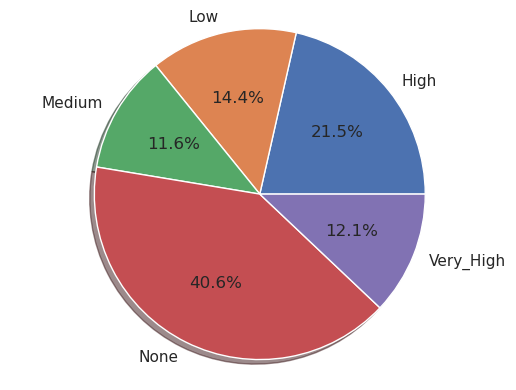

In [236]:
labels = data['incidents'].astype('category').cat.categories.tolist()
counts = data['incidents'].value_counts()

sizes = [counts[var_cat] for var_cat in labels]

fig, axl = plt.subplots()

axl.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the ¥ on plot
axl. axis('equal')

plt.show()

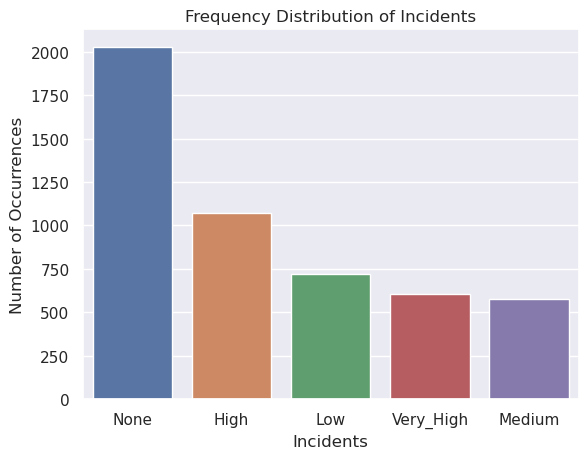

In [237]:
incidents_count = data['incidents'].value_counts()
sns.set(style="darkgrid")

sns.barplot(x=incidents_count.index, y=incidents_count.values)
plt.title('Frequency Distribution of Incidents')

plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Incidents', fontsize=12)

plt.show()

### Atributo 'magnitude_of_delay'

- A categoria 'Moderate' tem apenas 8 casos.
- A maioria das linhas estão no caso 'Undefined'(86.3%).

In [238]:
data['magnitude_of_delay'].value_counts()

UNDEFINED    4314
MAJOR         678
MODERATE        8
Name: magnitude_of_delay, dtype: int64

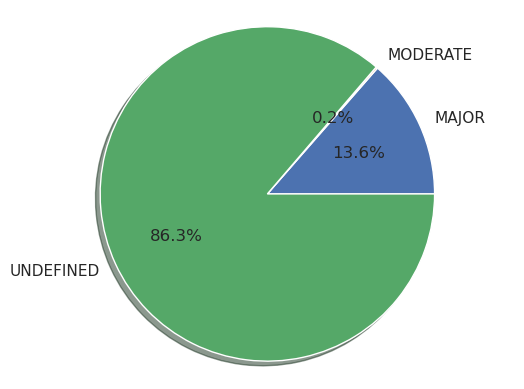

In [239]:
labels = data['magnitude_of_delay'].astype('category').cat.categories.tolist()
counts = data['magnitude_of_delay'].value_counts()

sizes = [counts[var_cat] for var_cat in labels]

fig, axl = plt.subplots()

axl.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the ¥ on plot
axl. axis('equal')

plt.show()

<AxesSubplot:title={'center':'Magnitude e output target'}>

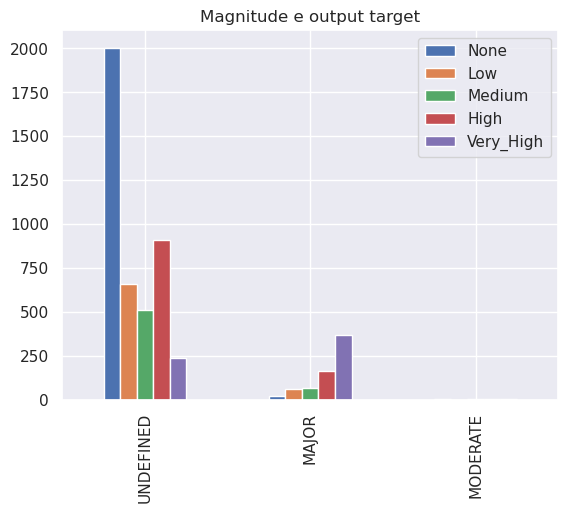

In [240]:
magnitude_target = pd.DataFrame()
magnitude_target['None'] = data[data['incidents'] == 'None']['magnitude_of_delay'].value_counts()
magnitude_target['Low'] = data[data['incidents'] == 'Low']['magnitude_of_delay'].value_counts()
magnitude_target['Medium'] = data[data['incidents'] == 'Medium']['magnitude_of_delay'].value_counts()
magnitude_target['High'] = data[data['incidents'] == 'High']['magnitude_of_delay'].value_counts()
magnitude_target['Very_High'] = data[data['incidents'] == 'Very_High']['magnitude_of_delay'].value_counts()
magnitude_target.plot.bar(title="Magnitude e output target")

### Atributo 'affected_roads'

Neste caso, verifica-se que existe uma quantidade elevado de valores unicos.
Uma vez que existem combinações várias de estradas pelas várias linhas, sendo possível visualizar qu, em alguns casos, só numa linha tem aquela combinação.
Adicionalmente, existe uma repetição excessiva de estradas em cada linha.

In [241]:
data['affected_roads'].value_counts()

N101,N101,N101,N101,N101                                                                                                                                      1514
N101,N101,N101,N101,N101,                                                                                                                                     1078
,                                                                                                                                                              709
N101,N101                                                                                                                                                      149
N101,N101,N101,N101,N101,N101                                                                                                                                  114
                                                                                                                                                              ... 
N101,N101,N105,N105,N1

### Atributo 'record_date'

- Os acidentes, ocorram em datas diferentes (dado a incluir as horas do dia).

In [242]:
data['record_date'].value_counts()

2021-03-15 23:00    1
2021-10-29 07:00    1
2021-04-25 03:00    1
2021-03-17 17:00    1
2021-07-22 00:00    1
                   ..
2021-10-19 00:00    1
2021-10-22 23:00    1
2021-12-04 23:00    1
2021-09-13 23:00    1
2021-12-20 02:00    1
Name: record_date, Length: 5000, dtype: int64

### Atributo 'luminosity'


In [243]:
data['luminosity'].value_counts()

DARK         2489
LIGHT        2325
LOW_LIGHT     186
Name: luminosity, dtype: int64

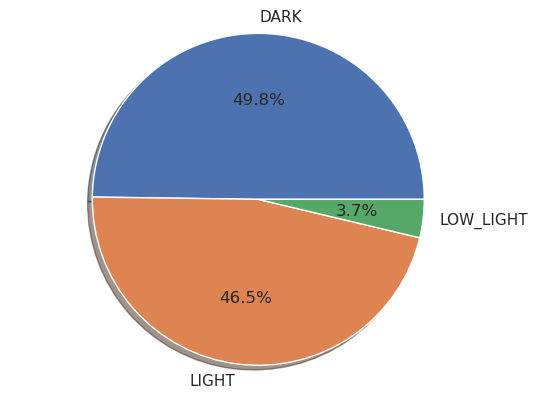

In [244]:
labels = data['luminosity'].astype('category').cat.categories.tolist()
counts = data['luminosity'].value_counts()

sizes = [counts[var_cat] for var_cat in labels]

fig, axl = plt.subplots()

axl.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the ¥ on plot
axl. axis('equal')

plt.show()

<AxesSubplot:title={'center':'Luminosidade e output target'}>

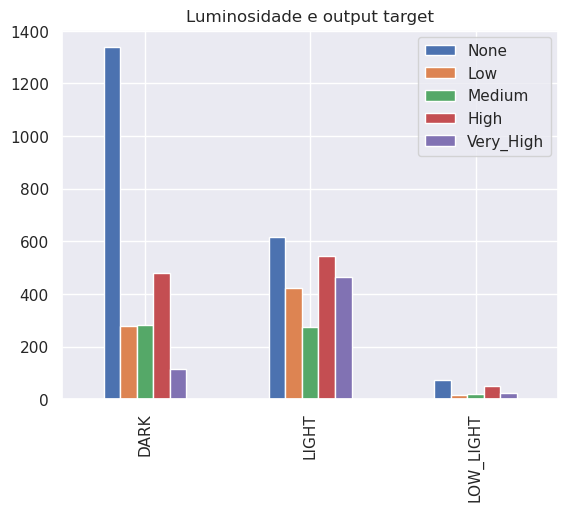

In [245]:
luminosity_target = pd.DataFrame()
luminosity_target['None'] = data[data['incidents'] == 'None']['luminosity'].value_counts()
luminosity_target['Low'] = data[data['incidents'] == 'Low']['luminosity'].value_counts()
luminosity_target['Medium'] = data[data['incidents'] == 'Medium']['luminosity'].value_counts()
luminosity_target['High'] = data[data['incidents'] == 'High']['luminosity'].value_counts()
luminosity_target['Very_High'] = data[data['incidents'] == 'Very_High']['luminosity'].value_counts()
luminosity_target.plot.bar(title="Luminosidade e output target")

### Atributo 'avg_rain'

- É notável que existe uma quantidade mínima de valores na categoria "chuva forte"

In [246]:
data['avg_rain'].value_counts()

Sem Chuva         4756
chuva fraca        214
chuva moderada      27
chuva forte          3
Name: avg_rain, dtype: int64

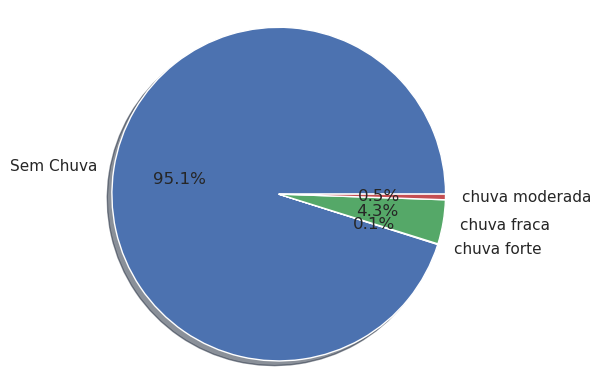

In [247]:
labels = data['avg_rain'].astype('category').cat.categories.tolist()
counts = data['avg_rain'].value_counts()

sizes = [counts[var_cat] for var_cat in labels]

fig, axl = plt.subplots()

axl.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the ¥ on plot
axl. axis('equal')

plt.show()

<AxesSubplot:title={'center':'Média de chuva e output target'}>

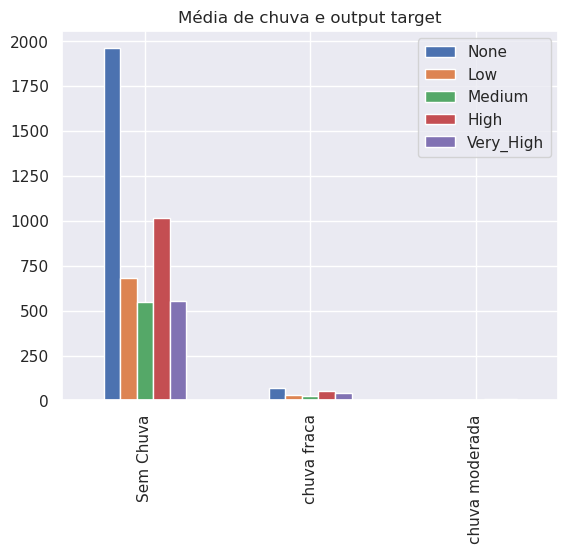

In [248]:
avg_rain_target = pd.DataFrame()
avg_rain_target['None'] = data[data['incidents'] == 'None']['avg_rain'].value_counts()
avg_rain_target['Low'] = data[data['incidents'] == 'Low']['avg_rain'].value_counts()
avg_rain_target['Medium'] = data[data['incidents'] == 'Medium']['avg_rain'].value_counts()
avg_rain_target['High'] = data[data['incidents'] == 'High']['avg_rain'].value_counts()
avg_rain_target['Very_High'] = data[data['incidents'] == 'Very_High']['avg_rain'].value_counts()
avg_rain_target.plot.bar(title="Média de chuva e output target")

### Atributo 'city_name'

- A amostra é numa única cidade (Guimarães).

In [249]:
data['city_name'].value_counts()

Guimaraes    5000
Name: city_name, dtype: int64

In [250]:
data['avg_temperature'].unique

<bound method Series.unique of 0       12.0
1       12.0
2       14.0
3       15.0
4       27.0
        ... 
4995    13.0
4996    19.0
4997    13.0
4998    12.0
4999    12.0
Name: avg_temperature, Length: 5000, dtype: float64>

In [251]:
data['avg_atm_pressure'].unique

<bound method Series.unique of 0       1013.0
1       1007.0
2       1025.0
3       1028.0
4       1020.0
         ...  
4995    1021.0
4996    1017.0
4997    1023.0
4998    1014.0
4999    1018.0
Name: avg_atm_pressure, Length: 5000, dtype: float64>

In [252]:
data['avg_humidity'].unique

<bound method Series.unique of 0       70.0
1       91.0
2       64.0
3       75.0
4       52.0
        ... 
4995    56.0
4996    68.0
4997    47.0
4998    93.0
4999    77.0
Name: avg_humidity, Length: 5000, dtype: float64>

In [253]:
data['avg_wind_speed'].unique

<bound method Series.unique of 0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
4995    0.0
4996    0.0
4997    2.0
4998    2.0
4999    3.0
Name: avg_wind_speed, Length: 5000, dtype: float64>

In [254]:
data['avg_precipitation'].value_counts()

0.0    5000
Name: avg_precipitation, dtype: int64

## Preparação de dados

### Remoção dos atributos 'avg_preciptation' e 'city_name'

- Removidos uma vez que são iguais para tds as linhas.

In [255]:
data.drop(['avg_precipitation', 'city_name'], axis = 1, inplace = True)
test.drop(['avg_precipitation', 'city_name'], axis = 1, inplace = True)

### Realizar Label Encoding no target ('incidents')

In [256]:
replace_map = {'incidents': {'None': 0, 'Low': 1, 'Medium': 2, 'High' : 3, 'Very_High':4}}

In [257]:
data.replace(replace_map, inplace = True)
test.replace(replace_map, inplace = True)
data.head()

magnitude_of_delay  delay_in_seconds  \
0          UNDEFINED                 0   
1          UNDEFINED               385   
2          UNDEFINED                69   
3              MAJOR              2297   
4          UNDEFINED                 0   

                                      affected_roads       record_date  \
0                                                  ,  2021-03-15 23:00   
1                                              N101,  2021-12-25 18:00   
2                                                  ,  2021-03-12 15:00   
3  N101,R206,N105,N101,N101,N101,N101,N101,N101,N...  2021-09-29 09:00   
4                          N101,N101,N101,N101,N101,  2021-06-13 11:00   

  luminosity  avg_temperature  avg_atm_pressure  avg_humidity  avg_wind_speed  \
0       DARK             12.0            1013.0          70.0             1.0   
1       DARK             12.0            1007.0          91.0             1.0   
2      LIGHT             14.0            1025.0          64.0             0.0   
3      LIGHT             15.0            1028.0          75.0             1.0   
4      LIGHT             27.0            1020.0          52.0             1.0   

    avg_rain  incidents  
0  Sem Chuva          0  
1  Sem Chuva          0  
2  Sem Chuva          1  
3  Sem Chuva          4  
4  Sem Chuva          3

### Realizar Label Encoding do atributo 'avg_rain'

In [258]:
data['avg_rain'].unique()

array(['Sem Chuva', 'chuva moderada', 'chuva fraca', 'chuva forte'],
      dtype=object)

In [259]:
replace_map_rain = {'avg_rain': {'Sem Chuva' : 0, 'chuva fraca' : 1, 'chuva moderada' : 2, 'chuva forte' : 3}}

In [260]:
data.replace(replace_map_rain, inplace = True)
test.replace(replace_map_rain, inplace = True)
data.head()

magnitude_of_delay  delay_in_seconds  \
0          UNDEFINED                 0   
1          UNDEFINED               385   
2          UNDEFINED                69   
3              MAJOR              2297   
4          UNDEFINED                 0   

                                      affected_roads       record_date  \
0                                                  ,  2021-03-15 23:00   
1                                              N101,  2021-12-25 18:00   
2                                                  ,  2021-03-12 15:00   
3  N101,R206,N105,N101,N101,N101,N101,N101,N101,N...  2021-09-29 09:00   
4                          N101,N101,N101,N101,N101,  2021-06-13 11:00   

  luminosity  avg_temperature  avg_atm_pressure  avg_humidity  avg_wind_speed  \
0       DARK             12.0            1013.0          70.0             1.0   
1       DARK             12.0            1007.0          91.0             1.0   
2      LIGHT             14.0            1025.0          64.0             0.0   
3      LIGHT             15.0            1028.0          75.0             1.0   
4      LIGHT             27.0            1020.0          52.0             1.0   

   avg_rain  incidents  
0         0          0  
1         0          0  
2         0          1  
3         0          4  
4         0          3

### Realizar Label Encoding com o atributo 'luminosity'

In [261]:
data['luminosity'].unique()

array(['DARK', 'LIGHT', 'LOW_LIGHT'], dtype=object)

In [262]:
replace_map_luminosity = {'luminosity': {'LOW_LIGHT' : 1, 'LIGHT' : 2, 'DARK' : 0}}

In [263]:
data.replace(replace_map_luminosity, inplace = True)
test.replace(replace_map_luminosity, inplace = True)
data.head()

magnitude_of_delay  delay_in_seconds  \
0          UNDEFINED                 0   
1          UNDEFINED               385   
2          UNDEFINED                69   
3              MAJOR              2297   
4          UNDEFINED                 0   

                                      affected_roads       record_date  \
0                                                  ,  2021-03-15 23:00   
1                                              N101,  2021-12-25 18:00   
2                                                  ,  2021-03-12 15:00   
3  N101,R206,N105,N101,N101,N101,N101,N101,N101,N...  2021-09-29 09:00   
4                          N101,N101,N101,N101,N101,  2021-06-13 11:00   

   luminosity  avg_temperature  avg_atm_pressure  avg_humidity  \
0           0             12.0            1013.0          70.0   
1           0             12.0            1007.0          91.0   
2           2             14.0            1025.0          64.0   
3           2             15.0            1028.0          75.0   
4           2             27.0            1020.0          52.0   

   avg_wind_speed  avg_rain  incidents  
0             1.0         0          0  
1             1.0         0          0  
2             0.0         0          1  
3             1.0         0          4  
4             1.0         0          3

In [264]:
values = {"affected_roads" : ","}
data = data.fillna(value=values)
test = test.fillna(value=values)

In [265]:
data.isna().sum()

magnitude_of_delay    0
delay_in_seconds      0
affected_roads        0
record_date           0
luminosity            0
avg_temperature       0
avg_atm_pressure      0
avg_humidity          0
avg_wind_speed        0
avg_rain              0
incidents             0
dtype: int64

In [266]:
test.isna().sum()

magnitude_of_delay    0
delay_in_seconds      0
affected_roads        0
record_date           0
luminosity            0
avg_temperature       0
avg_atm_pressure      0
avg_humidity          0
avg_wind_speed        0
avg_rain              0
dtype: int64

### Realizar One-Hot-Encoding no 'magnitude_of_delay'

- Contudo, isto resultou na criação de algumas linhas com valores null.

In [267]:
#one hot encoding
label = LabelBinarizer()
lb_results = label.fit_transform(data['magnitude_of_delay'])
lb_results_df = pd.DataFrame(lb_results, columns=label.classes_)
data = pd.concat([data, lb_results_df], axis=1)
data.drop(['magnitude_of_delay'], axis = 1, inplace = True)

lb_results = label.fit_transform(test['magnitude_of_delay'])
lb_results_df = pd.DataFrame(lb_results, columns=label.classes_)
test = pd.concat([test, lb_results_df], axis=1)
test.drop(['magnitude_of_delay'], axis = 1, inplace = True)


In [268]:
data

delay_in_seconds                                     affected_roads  \
0                    0                                                  ,   
1                  385                                              N101,   
2                   69                                                  ,   
3                 2297  N101,R206,N105,N101,N101,N101,N101,N101,N101,N...   
4                    0                          N101,N101,N101,N101,N101,   
...                ...                                                ...   
4995                 0                          N101,N101,N101,N101,N101,   
4996                 0                           N101,N101,N101,N101,N101   
4997                 0                                                  ,   
4998                 0                           N101,N101,N101,N101,N101   
4999                 0                           N101,N101,N101,N101,N101   

           record_date  luminosity  avg_temperature  avg_atm_pressure  \
0     2021-03-15 23:00           0             12.0            1013.0   
1     2021-12-25 18:00           0             12.0            1007.0   
2     2021-03-12 15:00           2             14.0            1025.0   
3     2021-09-29 09:00           2             15.0            1028.0   
4     2021-06-13 11:00           2             27.0            1020.0   
...                ...         ...              ...               ...   
4995  2021-04-13 00:00           0             13.0            1021.0   
4996  2021-07-06 14:00           2             19.0            1017.0   
4997  2021-03-18 03:00           0             13.0            1023.0   
4998  2021-11-02 06:00           0             12.0            1014.0   
4999  2021-12-20 02:00           0             12.0            1018.0   

      avg_humidity  avg_wind_speed  avg_rain  incidents  MAJOR  MODERATE  \
0             70.0             1.0         0          0      0         0   
1             91.0             1.0         0          0      0         0   
2             64.0             0.0         0          1      0         0   
3             75.0             1.0         0          4      1         0   
4             52.0             1.0         0          3      0         0   
...            ...             ...       ...        ...    ...       ...   
4995          56.0             0.0         0          3      0         0   
4996          68.0             0.0         0          0      0         0   
4997          47.0             2.0         0          0      0         0   
4998          93.0             2.0         0          0      0         0   
4999          77.0             3.0         0          0      0         0   

      UNDEFINED  
0             1  
1             1  
2             1  
3             0  
4             1  
...         ...  
4995          1  
4996          1  
4997          1  
4998          1  
4999          1  

[5000 rows x 13 columns]

In [269]:
test

delay_in_seconds                      affected_roads       record_date  \
0                 1211      N101,N101,N101,N101,N101,N101,  2021-04-13 19:00   
1                    0            N101,N101,N101,N101,N101  2021-10-13 04:00   
2                    0            N101,N101,N101,N101,N101  2021-07-18 19:00   
3                  140       N101,R206,N101,N101,N101,N101  2021-10-30 15:00   
4                    0            N101,N101,N101,N101,N101  2021-10-18 10:00   
...                ...                                 ...               ...   
1201                 0                                N101  2021-12-31 10:00   
1202                44            N101,N101,N101,N101,N101  2021-07-16 00:00   
1203              1261  N101,N101,N101,N101,N101,N101,N101  2021-12-19 15:00   
1204               246                                   ,  2021-03-08 17:00   
1205                 0           N101,N101,N101,N101,N101,  2021-06-06 10:00   

      luminosity  avg_temperature  avg_atm_pressure  avg_humidity  \
0              2             15.0            1018.0          80.0   
1              0             16.0            1018.0          41.0   
2              2             22.0            1017.0          71.0   
3              2             18.0            1008.0          81.0   
4              2             20.0            1022.0          86.0   
...          ...              ...               ...           ...   
1201           2             12.0            1025.0          70.0   
1202           0             24.0            1016.0          39.0   
1203           2             13.0            1018.0          60.0   
1204           2             15.0            1015.0          50.0   
1205           2             19.0            1022.0          45.0   

      avg_wind_speed  avg_rain  MAJOR  MODERATE  UNDEFINED  
0                0.0         0      0         0          1  
1                2.0         0      0         0          1  
2                0.0         0      0         0          1  
3                3.0         0      0         0          1  
4                0.0         0      0         0          1  
...              ...       ...    ...       ...        ...  
1201             2.0         0      0         0          1  
1202             2.0         0      0         0          1  
1203             0.0         0      1         0          0  
1204             1.0         0      0         0          1  
1205             1.0         0      0         0          1  

[1206 rows x 12 columns]

### Atributo 'affected_roads'

- Inicialmente extraiu-se todas as ruas únicas das strings da coluna 'affected_roads'


Existem 4 tipos de estradas nos dois datasets, de teste e treino:
- Estradas nacionais (N)
- Estradas Municipais (EM)
- Itenerários Complementares (IC)
- Ruas (R)

Criou-se 5 novas colunas, com base nesta análise:
- Uma para cada tipo de estrada (N | EM | IC | R)
- o número de estradas únicas afetadas (n.estradas)

E realizou-se para as ruas uma estratégia de "one-hot-encoding",
colocando uma opção binária para caso as ruas afetadas são ou não
daquele tipo.

No final, apresentam-se 17 colunas no dataset.

In [270]:
all_roads = []

for row in data.index:
    roads = data['affected_roads'][row]

    roads_split = roads.split(',')
    for r in range(len(roads_split)):
        if(len(roads_split[r]) > 0):
            road = roads_split[r]
            all_roads.append(road)


all_roads = set(all_roads)

print("Todas as estradas unicas: ",all_roads)


Todas as estradas unicas:  {'N310', 'N309', 'N207-4', 'EM579', 'N101', 'N206', 'IC5 - N206', 'R206', 'N105', 'IC5'}


In [271]:
test_all_roads = []

for row in test.index:
    roads = test['affected_roads'][row]
    roads_split = roads.split(',')
    for r in range(len(roads_split)):
        if(len(roads_split[r]) > 0):
            road = roads_split[r]
            test_all_roads.append(road)


test_all_roads = set(test_all_roads)

print("Todas as estradas unicas: ",test_all_roads)

Todas as estradas unicas:  {'N310', 'N309', 'N207-4', 'EM579', 'N101', 'N101 - N310', 'N206', 'R206', 'N105', 'IC5'}


In [272]:
affected_ohe = []

for row in data.index:
    roads = data['affected_roads'][row]
    roads_split = roads.split(',')
    
    has_n = 0
    has_em = 0
    has_ic = 0
    has_r = 0
    n_roads = 0

    if 'N' in roads:
        has_n = 1

    if 'EM' in roads:
        has_em = 1 
    
    if 'IC' in roads:
        has_ic = 1

    if 'R' in roads:
        has_r = 1

    roads_list = []
    for road in roads_split:
        if road != "":
            roads_list.append(road)

    roads_set = set(roads_list)

    affected_ohe.append({
        'N': has_n, 
        'EM':has_em, 
        'IC':has_ic, 
        'R': has_r, 
        'n.estradas': len(roads_set)
    })

    affected_df = pd.DataFrame(affected_ohe)

affected_df

N  EM  IC  R  n.estradas
0     0   0   0  0           0
1     1   0   0  0           1
2     0   0   0  0           0
3     1   0   0  1           3
4     1   0   0  0           1
...  ..  ..  .. ..         ...
4995  1   0   0  0           1
4996  1   0   0  0           1
4997  0   0   0  0           0
4998  1   0   0  0           1
4999  1   0   0  0           1

[5000 rows x 5 columns]

In [273]:
data = pd.merge(data ,affected_df,left_index=True, right_index=True)
data.drop(['affected_roads'], axis = 1, inplace = True)
data

delay_in_seconds       record_date  luminosity  avg_temperature  \
0                    0  2021-03-15 23:00           0             12.0   
1                  385  2021-12-25 18:00           0             12.0   
2                   69  2021-03-12 15:00           2             14.0   
3                 2297  2021-09-29 09:00           2             15.0   
4                    0  2021-06-13 11:00           2             27.0   
...                ...               ...         ...              ...   
4995                 0  2021-04-13 00:00           0             13.0   
4996                 0  2021-07-06 14:00           2             19.0   
4997                 0  2021-03-18 03:00           0             13.0   
4998                 0  2021-11-02 06:00           0             12.0   
4999                 0  2021-12-20 02:00           0             12.0   

      avg_atm_pressure  avg_humidity  avg_wind_speed  avg_rain  incidents  \
0               1013.0          70.0             1.0         0          0   
1               1007.0          91.0             1.0         0          0   
2               1025.0          64.0             0.0         0          1   
3               1028.0          75.0             1.0         0          4   
4               1020.0          52.0             1.0         0          3   
...                ...           ...             ...       ...        ...   
4995            1021.0          56.0             0.0         0          3   
4996            1017.0          68.0             0.0         0          0   
4997            1023.0          47.0             2.0         0          0   
4998            1014.0          93.0             2.0         0          0   
4999            1018.0          77.0             3.0         0          0   

      MAJOR  MODERATE  UNDEFINED  N  EM  IC  R  n.estradas  
0         0         0          1  0   0   0  0           0  
1         0         0          1  1   0   0  0           1  
2         0         0          1  0   0   0  0           0  
3         1         0          0  1   0   0  1           3  
4         0         0          1  1   0   0  0           1  
...     ...       ...        ... ..  ..  .. ..         ...  
4995      0         0          1  1   0   0  0           1  
4996      0         0          1  1   0   0  0           1  
4997      0         0          1  0   0   0  0           0  
4998      0         0          1  1   0   0  0           1  
4999      0         0          1  1   0   0  0           1  

[5000 rows x 17 columns]

In [274]:
affected_ohe = []

for row in test.index:
    roads = test['affected_roads'][row]
    roads_split = roads.split(',')
    
    has_n = 0
    has_em = 0
    has_ic = 0
    has_r = 0
    n_roads = 0

    if 'N' in roads:
        has_n = 1

    if 'EM' in roads:
        has_em = 1 
    
    if 'IC' in roads:
        has_ic = 1

    if 'R' in roads:
        has_r = 1

    roads_list = []
    for road in roads_split:
        if road != "":
            roads_list.append(road)

    roads_set = set(roads_list)

    affected_ohe.append({
        'N': has_n, 
        'EM':has_em, 
        'IC':has_ic, 
        'R': has_r, 
        'n.estradas': len(roads_set)
    })

    affected_df = pd.DataFrame(affected_ohe)

affected_df

N  EM  IC  R  n.estradas
0     1   0   0  0           1
1     1   0   0  0           1
2     1   0   0  0           1
3     1   0   0  1           2
4     1   0   0  0           1
...  ..  ..  .. ..         ...
1201  1   0   0  0           1
1202  1   0   0  0           1
1203  1   0   0  0           1
1204  0   0   0  0           0
1205  1   0   0  0           1

[1206 rows x 5 columns]

In [275]:
test = pd.merge(test ,affected_df,left_index=True, right_index=True)
test.drop(['affected_roads'], axis = 1, inplace = True)
test

delay_in_seconds       record_date  luminosity  avg_temperature  \
0                 1211  2021-04-13 19:00           2             15.0   
1                    0  2021-10-13 04:00           0             16.0   
2                    0  2021-07-18 19:00           2             22.0   
3                  140  2021-10-30 15:00           2             18.0   
4                    0  2021-10-18 10:00           2             20.0   
...                ...               ...         ...              ...   
1201                 0  2021-12-31 10:00           2             12.0   
1202                44  2021-07-16 00:00           0             24.0   
1203              1261  2021-12-19 15:00           2             13.0   
1204               246  2021-03-08 17:00           2             15.0   
1205                 0  2021-06-06 10:00           2             19.0   

      avg_atm_pressure  avg_humidity  avg_wind_speed  avg_rain  MAJOR  \
0               1018.0          80.0             0.0         0      0   
1               1018.0          41.0             2.0         0      0   
2               1017.0          71.0             0.0         0      0   
3               1008.0          81.0             3.0         0      0   
4               1022.0          86.0             0.0         0      0   
...                ...           ...             ...       ...    ...   
1201            1025.0          70.0             2.0         0      0   
1202            1016.0          39.0             2.0         0      0   
1203            1018.0          60.0             0.0         0      1   
1204            1015.0          50.0             1.0         0      0   
1205            1022.0          45.0             1.0         0      0   

      MODERATE  UNDEFINED  N  EM  IC  R  n.estradas  
0            0          1  1   0   0  0           1  
1            0          1  1   0   0  0           1  
2            0          1  1   0   0  0           1  
3            0          1  1   0   0  1           2  
4            0          1  1   0   0  0           1  
...        ...        ... ..  ..  .. ..         ...  
1201         0          1  1   0   0  0           1  
1202         0          1  1   0   0  0           1  
1203         0          0  1   0   0  0           1  
1204         0          1  0   0   0  0           0  
1205         0          1  1   0   0  0           1  

[1206 rows x 16 columns]

### Atributo 'record_date'

In [276]:
data_dt = data.copy()

In [277]:
data_dt['record_date'] = pd.to_datetime(data_dt['record_date'], format='%Y-%m-%d %H:%M', errors='coerce')

In [278]:
data_dt['record_date'].head()

0   2021-03-15 23:00:00
1   2021-12-25 18:00:00
2   2021-03-12 15:00:00
3   2021-09-29 09:00:00
4   2021-06-13 11:00:00
Name: record_date, dtype: datetime64[ns]

In [279]:
data['date_year'] = data_dt['record_date'].dt.year
data['date_month'] = data_dt['record_date'].dt.month
data['date_day'] = data_dt['record_date'].dt.day
data['date_hour'] = data_dt['record_date'].dt.hour
data.drop(['record_date'], axis=1, inplace = True)
test['date_year'] = data_dt['record_date'].dt.year
test['date_month'] = data_dt['record_date'].dt.month
test['date_day'] = data_dt['record_date'].dt.day
test['date_hour'] = data_dt['record_date'].dt.hour
test.drop(['record_date'], axis=1, inplace = True)
data.head()

delay_in_seconds  luminosity  avg_temperature  avg_atm_pressure  \
0                 0           0             12.0            1013.0   
1               385           0             12.0            1007.0   
2                69           2             14.0            1025.0   
3              2297           2             15.0            1028.0   
4                 0           2             27.0            1020.0   

   avg_humidity  avg_wind_speed  avg_rain  incidents  MAJOR  MODERATE  \
0          70.0             1.0         0          0      0         0   
1          91.0             1.0         0          0      0         0   
2          64.0             0.0         0          1      0         0   
3          75.0             1.0         0          4      1         0   
4          52.0             1.0         0          3      0         0   

   UNDEFINED  N  EM  IC  R  n.estradas  date_year  date_month  date_day  \
0          1  0   0   0  0           0       2021           3        15   
1          1  1   0   0  0           1       2021          12        25   
2          1  0   0   0  0           0       2021           3        12   
3          0  1   0   0  1           3       2021           9        29   
4          1  1   0   0  0           1       2021           6        13   

   date_hour  
0         23  
1         18  
2         15  
3          9  
4         11

In [280]:
data['date_year'].unique()

array([2021])

In [281]:
data.drop(['date_year'], axis=1, inplace = True)
test.drop(['date_year'], axis=1, inplace = True)

In [282]:
data.head()

delay_in_seconds  luminosity  avg_temperature  avg_atm_pressure  \
0                 0           0             12.0            1013.0   
1               385           0             12.0            1007.0   
2                69           2             14.0            1025.0   
3              2297           2             15.0            1028.0   
4                 0           2             27.0            1020.0   

   avg_humidity  avg_wind_speed  avg_rain  incidents  MAJOR  MODERATE  \
0          70.0             1.0         0          0      0         0   
1          91.0             1.0         0          0      0         0   
2          64.0             0.0         0          1      0         0   
3          75.0             1.0         0          4      1         0   
4          52.0             1.0         0          3      0         0   

   UNDEFINED  N  EM  IC  R  n.estradas  date_month  date_day  date_hour  
0          1  0   0   0  0           0           3        15         23  
1          1  1   0   0  0           1          12        25         18  
2          1  0   0   0  0           0           3        12         15  
3          0  1   0   0  1           3           9        29          9  
4          1  1   0   0  0           1           6        13         11

In [283]:
test.head()

delay_in_seconds  luminosity  avg_temperature  avg_atm_pressure  \
0              1211           2             15.0            1018.0   
1                 0           0             16.0            1018.0   
2                 0           2             22.0            1017.0   
3               140           2             18.0            1008.0   
4                 0           2             20.0            1022.0   

   avg_humidity  avg_wind_speed  avg_rain  MAJOR  MODERATE  UNDEFINED  N  EM  \
0          80.0             0.0         0      0         0          1  1   0   
1          41.0             2.0         0      0         0          1  1   0   
2          71.0             0.0         0      0         0          1  1   0   
3          81.0             3.0         0      0         0          1  1   0   
4          86.0             0.0         0      0         0          1  1   0   

   IC  R  n.estradas  date_month  date_day  date_hour  
0   0  0           1           3        15         23  
1   0  0           1          12        25         18  
2   0  0           1           3        12         15  
3   0  1           2           9        29          9  
4   0  0           1           6        13         11

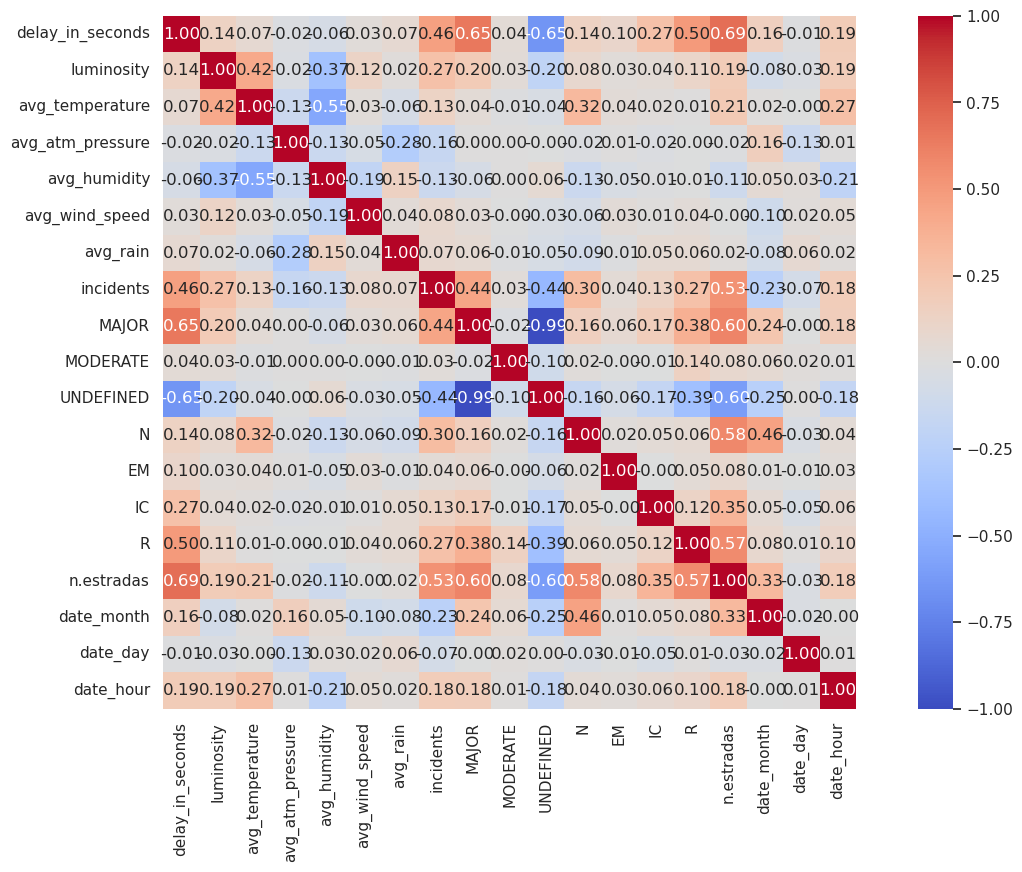

In [284]:
#Correlation
corr_matrix = data.corr()
f, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True, fmt='.2f', cmap='coolwarm');

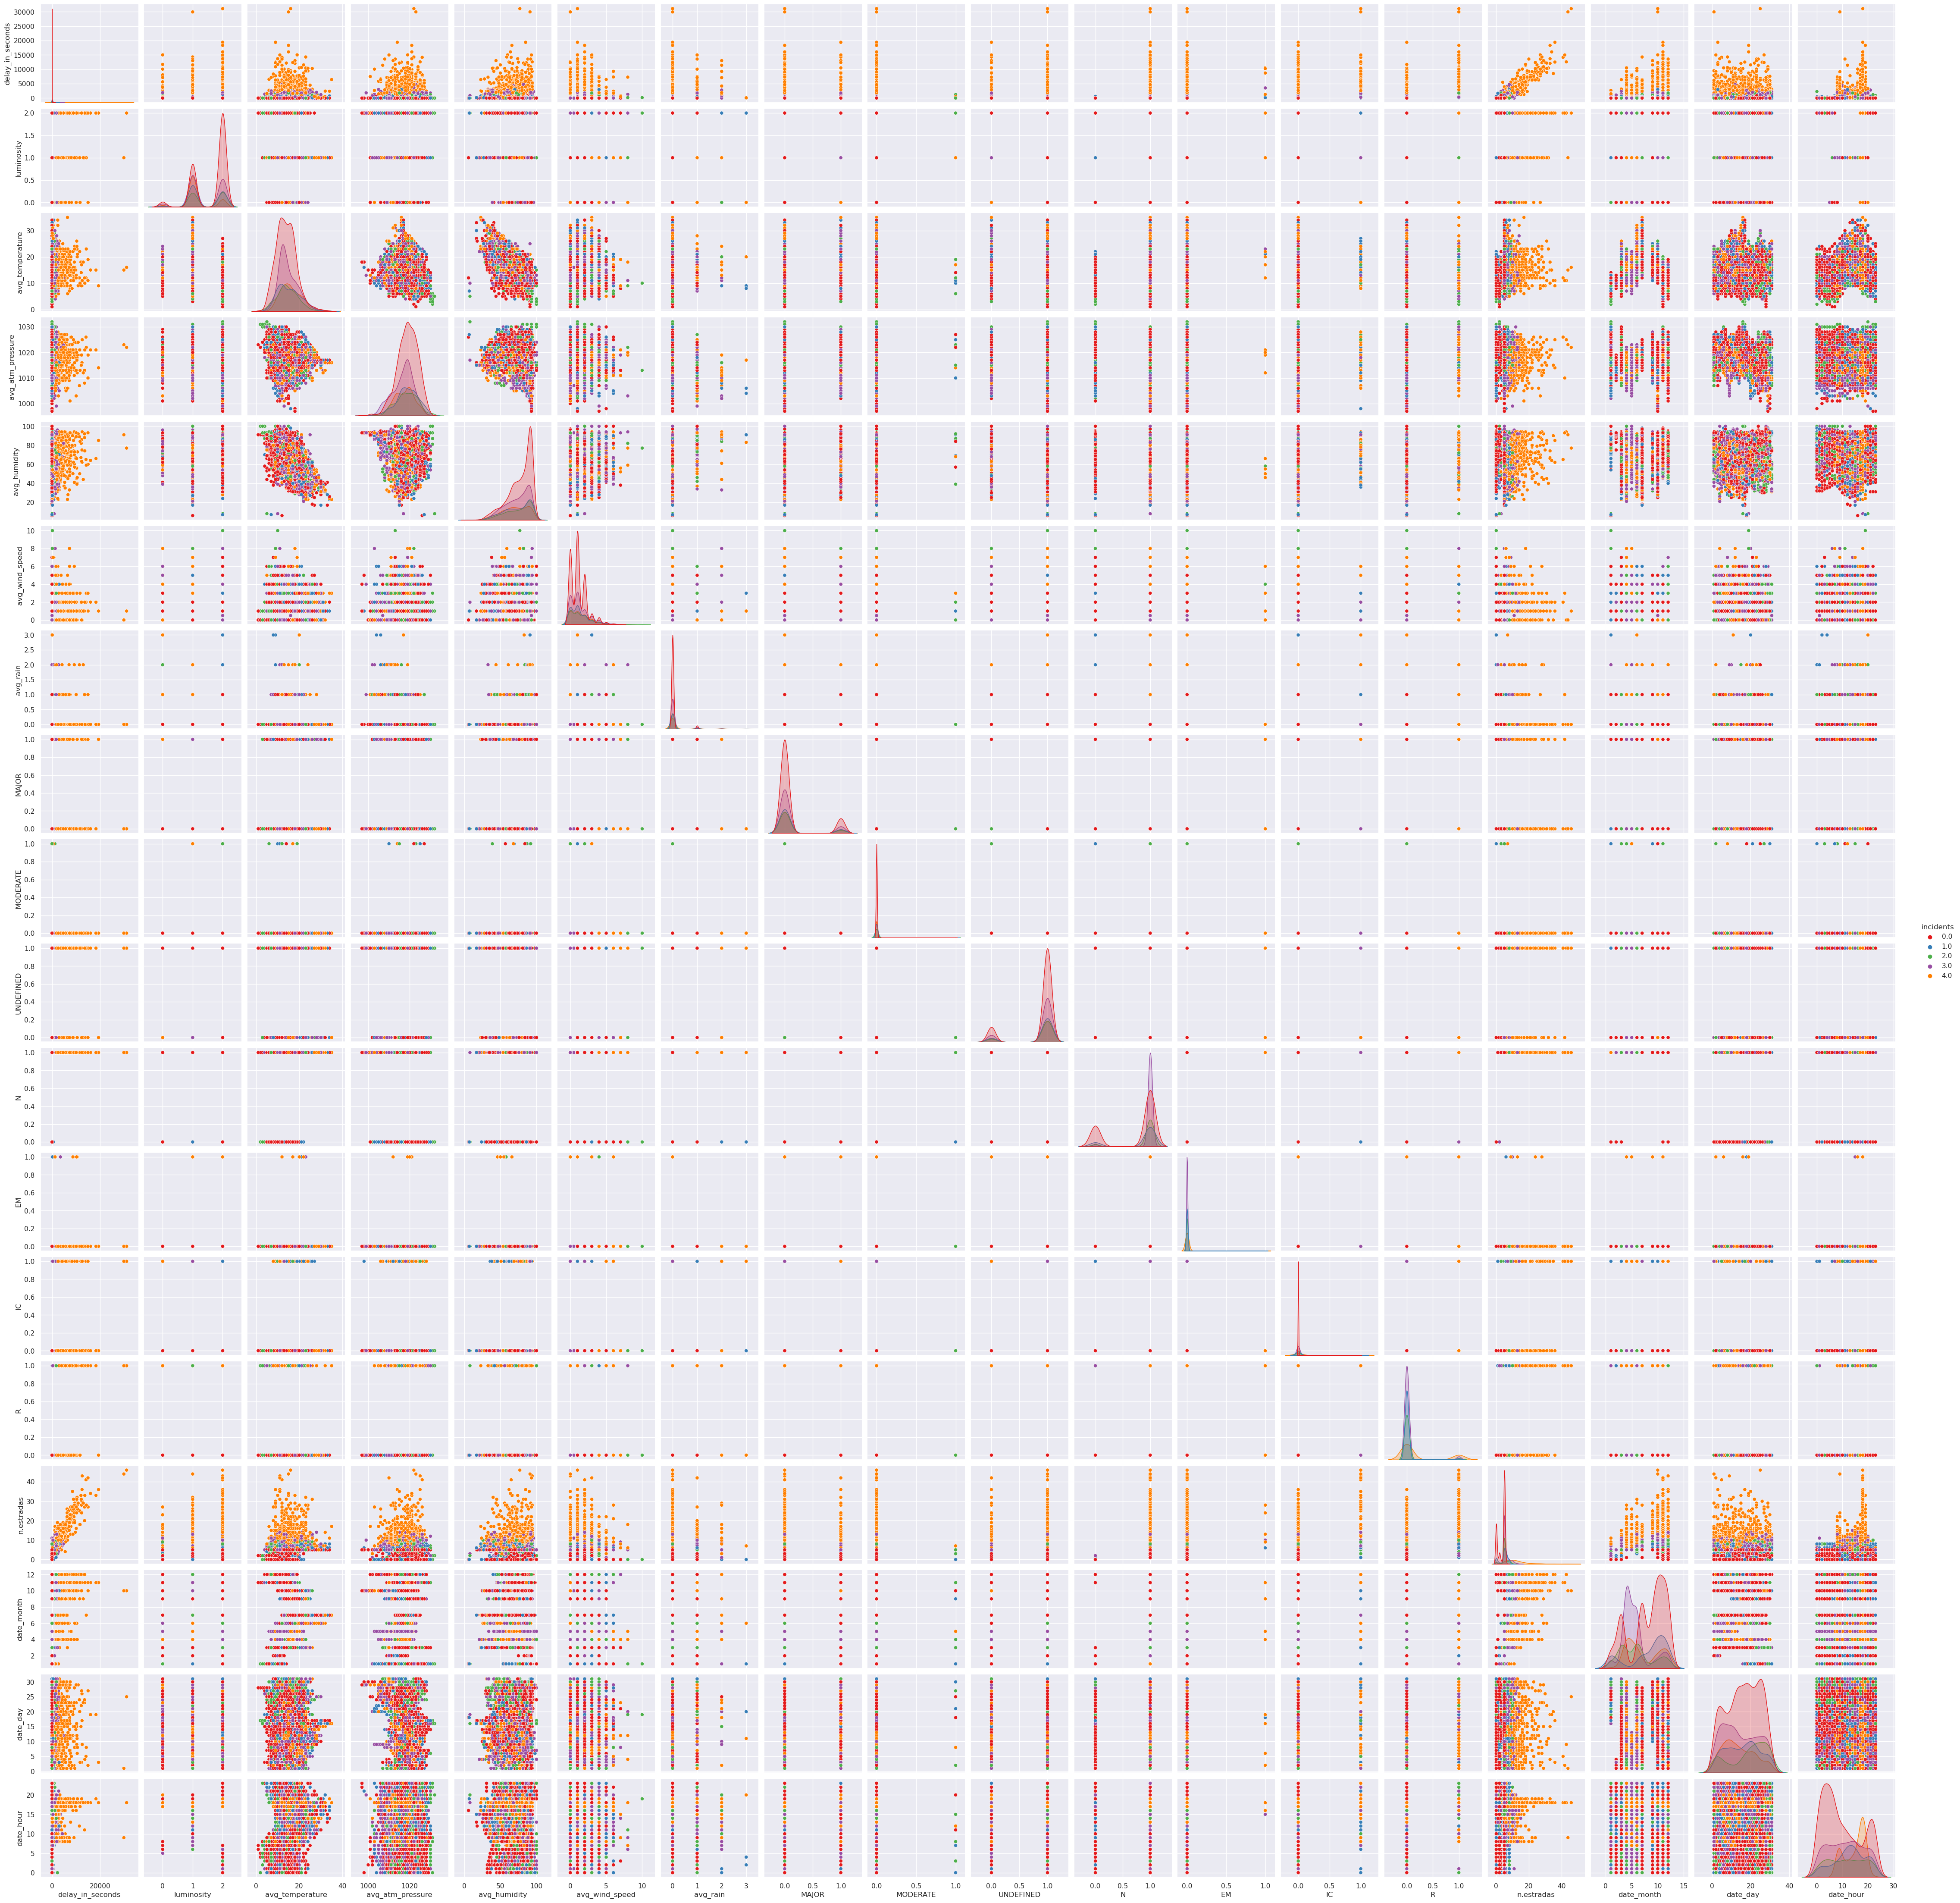

In [640]:
sns.pairplot(data, hue='incidents', palette='Set1')

# Train Test Split

** Split your data into a training set and a testing set.**

In [285]:
data

delay_in_seconds  luminosity  avg_temperature  avg_atm_pressure  \
0                    0           0             12.0            1013.0   
1                  385           0             12.0            1007.0   
2                   69           2             14.0            1025.0   
3                 2297           2             15.0            1028.0   
4                    0           2             27.0            1020.0   
...                ...         ...              ...               ...   
4995                 0           0             13.0            1021.0   
4996                 0           2             19.0            1017.0   
4997                 0           0             13.0            1023.0   
4998                 0           0             12.0            1014.0   
4999                 0           0             12.0            1018.0   

      avg_humidity  avg_wind_speed  avg_rain  incidents  MAJOR  MODERATE  \
0             70.0             1.0         0          0      0         0   
1             91.0             1.0         0          0      0         0   
2             64.0             0.0         0          1      0         0   
3             75.0             1.0         0          4      1         0   
4             52.0             1.0         0          3      0         0   
...            ...             ...       ...        ...    ...       ...   
4995          56.0             0.0         0          3      0         0   
4996          68.0             0.0         0          0      0         0   
4997          47.0             2.0         0          0      0         0   
4998          93.0             2.0         0          0      0         0   
4999          77.0             3.0         0          0      0         0   

      UNDEFINED  N  EM  IC  R  n.estradas  date_month  date_day  date_hour  
0             1  0   0   0  0           0           3        15         23  
1             1  1   0   0  0           1          12        25         18  
2             1  0   0   0  0           0           3        12         15  
3             0  1   0   0  1           3           9        29          9  
4             1  1   0   0  0           1           6        13         11  
...         ... ..  ..  .. ..         ...         ...       ...        ...  
4995          1  1   0   0  0           1           4        13          0  
4996          1  1   0   0  0           1           7         6         14  
4997          1  0   0   0  0           0           3        18          3  
4998          1  1   0   0  0           1          11         2          6  
4999          1  1   0   0  0           1          12        20          2  

[5000 rows x 19 columns]

In [286]:
test

delay_in_seconds  luminosity  avg_temperature  avg_atm_pressure  \
0                 1211           2             15.0            1018.0   
1                    0           0             16.0            1018.0   
2                    0           2             22.0            1017.0   
3                  140           2             18.0            1008.0   
4                    0           2             20.0            1022.0   
...                ...         ...              ...               ...   
1201                 0           2             12.0            1025.0   
1202                44           0             24.0            1016.0   
1203              1261           2             13.0            1018.0   
1204               246           2             15.0            1015.0   
1205                 0           2             19.0            1022.0   

      avg_humidity  avg_wind_speed  avg_rain  MAJOR  MODERATE  UNDEFINED  N  \
0             80.0             0.0         0      0         0          1  1   
1             41.0             2.0         0      0         0          1  1   
2             71.0             0.0         0      0         0          1  1   
3             81.0             3.0         0      0         0          1  1   
4             86.0             0.0         0      0         0          1  1   
...            ...             ...       ...    ...       ...        ... ..   
1201          70.0             2.0         0      0         0          1  1   
1202          39.0             2.0         0      0         0          1  1   
1203          60.0             0.0         0      1         0          0  1   
1204          50.0             1.0         0      0         0          1  0   
1205          45.0             1.0         0      0         0          1  1   

      EM  IC  R  n.estradas  date_month  date_day  date_hour  
0      0   0  0           1           3        15         23  
1      0   0  0           1          12        25         18  
2      0   0  0           1           3        12         15  
3      0   0  1           2           9        29          9  
4      0   0  0           1           6        13         11  
...   ..  .. ..         ...         ...       ...        ...  
1201   0   0  0           1           7        27         11  
1202   0   0  0           1           4        13         13  
1203   0   0  0           1           3         5          1  
1204   0   0  0           0           7         4         12  
1205   0   0  0           1           4        30          1  

[1206 rows x 18 columns]

In [287]:
X = data.drop('incidents', axis=1)
Y = data['incidents'].to_frame()

In [288]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=2022, stratify=Y)

## Decision Tree

In [289]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [290]:
#Create an instance of a Decision Tree classifier
#Again, defining the random_state for reproducibility
clf = DecisionTreeClassifier(random_state=2022)

In [136]:
#to csv
X_train = data.drop(['incidents'], axis=1)
y_train = data['incidents'].to_frame()
X_test = test

In [291]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2022)

In [292]:
predictions = clf.predict(X_test)
predictions

array([2, 3, 4, 0, 0, 3, 0, 3, 0, 0, 1, 0, 0, 4, 4, 0, 2, 3, 1, 3, 0, 0,
       2, 1, 1, 3, 3, 0, 2, 1, 2, 1, 4, 4, 0, 0, 0, 0, 1, 0, 4, 4, 3, 0,
       0, 0, 3, 1, 0, 3, 0, 4, 2, 0, 3, 4, 3, 0, 0, 4, 0, 0, 1, 0, 0, 1,
       0, 2, 4, 0, 4, 0, 0, 4, 0, 3, 3, 4, 0, 2, 0, 0, 3, 0, 1, 1, 0, 2,
       0, 1, 2, 4, 2, 4, 2, 2, 0, 4, 0, 0, 0, 0, 2, 0, 3, 0, 3, 0, 0, 4,
       3, 0, 2, 0, 0, 3, 3, 0, 1, 1, 2, 4, 0, 0, 0, 3, 0, 3, 1, 2, 3, 2,
       0, 3, 4, 1, 1, 0, 1, 3, 3, 0, 3, 2, 4, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       3, 0, 1, 4, 1, 0, 1, 3, 2, 0, 0, 4, 0, 3, 0, 3, 3, 3, 4, 3, 2, 4,
       4, 0, 1, 0, 0, 0, 0, 4, 0, 4, 2, 4, 2, 4, 3, 1, 1, 0, 0, 0, 2, 3,
       0, 3, 3, 2, 0, 0, 0, 0, 1, 4, 4, 3, 3, 4, 0, 4, 3, 2, 0, 1, 4, 3,
       3, 0, 0, 4, 1, 2, 4, 2, 3, 0, 2, 0, 0, 3, 4, 1, 3, 4, 1, 0, 2, 3,
       0, 0, 2, 3, 4, 0, 0, 3, 2, 0, 0, 0, 3, 4, 1, 0, 1, 1, 0, 1, 0, 3,
       3, 1, 0, 3, 0, 2, 2, 2, 4, 1, 3, 2, 3, 0, 2, 3, 0, 1, 0, 0, 0, 3,
       0, 4, 0, 0, 0, 2, 4, 4, 1, 4, 0, 0, 0, 2, 0,

In [139]:
predictions = pd.DataFrame(predictions)
predictions.columns = ['Incidents']
predictions.index += 1
replace_map = {'Incidents' : {0 : 'None', 1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very_High'}}
predictions.replace(replace_map, inplace = True)
predictions.to_csv('predictions.csv', index = True, index_label = 'RowId')

predictions

Incidents
1          High
2           Low
3          High
4           Low
5          High
...         ...
1202       None
1203  Very_High
1204       High
1205       None
1206       High

[1206 rows x 1 columns]

In [293]:
confusion_matrix(y_test, predictions)

array([[389,  12,   1,   3,   0],
       [ 14, 113,  10,   7,   0],
       [  1,   6, 100,   9,   0],
       [  0,   3,   9, 186,  16],
       [  0,   0,   3,  15, 103]])

In [294]:
accuracy_score(y_test, predictions)

0.891

In [295]:
precision_score(y_test, predictions, average='macro')

0.8660327526483013

In [296]:
recall_score(y_test, predictions, average='macro')

0.8655367125652236

In [297]:
f1_score(y_test, predictions, average='macro')

0.8653854004417276

In [299]:
fbeta_score(y_test, predictions, beta=0.5, average='macro')

0.8656767203737727

## SVM

In [300]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [301]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 3193 to 2008
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   delay_in_seconds  4000 non-null   int64  
 1   luminosity        4000 non-null   int64  
 2   avg_temperature   4000 non-null   float64
 3   avg_atm_pressure  4000 non-null   float64
 4   avg_humidity      4000 non-null   float64
 5   avg_wind_speed    4000 non-null   float64
 6   avg_rain          4000 non-null   int64  
 7   MAJOR             4000 non-null   int64  
 8   MODERATE          4000 non-null   int64  
 9   UNDEFINED         4000 non-null   int64  
 10  N                 4000 non-null   int64  
 11  EM                4000 non-null   int64  
 12  IC                4000 non-null   int64  
 13  R                 4000 non-null   int64  
 14  n.estradas        4000 non-null   int64  
 15  date_month        4000 non-null   int64  
 16  date_day          4000 non-null   int64

In [302]:
cross_valid_model = SVC(random_state=2021)
scores = cross_val_score(cross_valid_model, X_train, np.ravel(y_train), cv=10)
scores

array([0.535 , 0.55  , 0.5225, 0.5725, 0.5575, 0.5425, 0.5375, 0.5275,
       0.53  , 0.555 ])

In [303]:
print("%0.2f accuracy" % (scores.mean()))

0.54 accuracy


In [304]:
model = SVC(random_state=2021)
model.fit(X_train, np.ravel(y_train))

SVC(random_state=2021)

In [305]:
print("%0.2f accuracy" % accuracy_score(y_test, predictions))

0.89 accuracy


/home/josefam/miniconda3/envs/daa/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


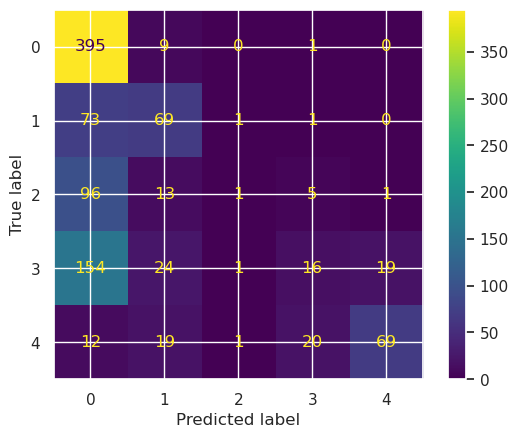

In [306]:
plot_confusion_matrix(model, X_test, y_test)

In [307]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       405
           1       0.84      0.78      0.81       144
           2       0.81      0.86      0.84       116
           3       0.85      0.87      0.86       214
           4       0.87      0.85      0.86       121

    accuracy                           0.89      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.89      0.89      0.89      1000



In [308]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

In [309]:
from sklearn.model_selection import GridSearchCV

In [310]:
grid = GridSearchCV(SVC(random_state=2021), param_grid, refit=True, verbose=3, n_jobs=-1)

In [311]:
grid.fit(X_train, np.ravel(y_train))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.405 total time=   3.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.429 total time=   3.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.431 total time=   3.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.406 total time=   4.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.405 total time=   4.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.406 total time=   4.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.405 total time=   5.1s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.405 total time=   5.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.406 total time=   5.1s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.431 total time=   2.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.406 total time=   5.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf

GridSearchCV(estimator=SVC(random_state=2021), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [312]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [313]:
grid.best_estimator_

SVC(C=1000, gamma=0.001, random_state=2021)

In [849]:
#to csv
predictions = grid.predict(X_test)
predictions = pd.DataFrame(predictions)
predictions.columns = ['Incidents']
predictions.index += 1
replace_map = {'Incidents' : {0 : 'None', 1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very_High'}}
predictions.replace(replace_map, inplace = True)
predictions.to_csv('predictions.csv', index = True, index_label = 'RowId')

/home/josefam/miniconda3/envs/daa/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


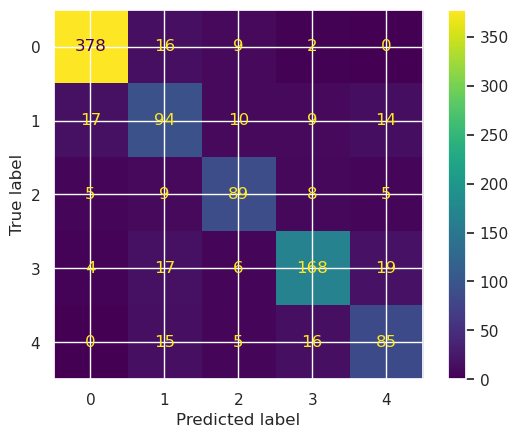

In [314]:
plot_confusion_matrix(grid, X_test, y_test)

In [315]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       405
           1       0.62      0.65      0.64       144
           2       0.75      0.77      0.76       116
           3       0.83      0.79      0.81       214
           4       0.69      0.70      0.70       121

    accuracy                           0.81      1000
   macro avg       0.76      0.77      0.77      1000
weighted avg       0.82      0.81      0.81      1000



## Neural

Build our neural network 

In [328]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
#from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler


In [317]:
#Scale the data
scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(X)
scaler_y = MinMaxScaler(feature_range=(0, 1)).fit(Y)
X_scaled = pd.DataFrame(scaler_X.transform(X[X.columns]), columns=X.columns)
Y_scaled = pd.DataFrame(scaler_y.transform(Y[Y.columns]), columns=Y.columns)

In [318]:
X.head()

delay_in_seconds  luminosity  avg_temperature  avg_atm_pressure  \
0                 0           0             12.0            1013.0   
1               385           0             12.0            1007.0   
2                69           2             14.0            1025.0   
3              2297           2             15.0            1028.0   
4                 0           2             27.0            1020.0   

   avg_humidity  avg_wind_speed  avg_rain  MAJOR  MODERATE  UNDEFINED  N  EM  \
0          70.0             1.0         0      0         0          1  0   0   
1          91.0             1.0         0      0         0          1  1   0   
2          64.0             0.0         0      0         0          1  0   0   
3          75.0             1.0         0      1         0          0  1   0   
4          52.0             1.0         0      0         0          1  1   0   

   IC  R  n.estradas  date_month  date_day  date_hour  
0   0  0           0           3        15         23  
1   0  0           1          12        25         18  
2   0  0           0           3        12         15  
3   0  1           3           9        29          9  
4   0  0           1           6        13         11

In [319]:
X_scaled.head()

delay_in_seconds  luminosity  avg_temperature  avg_atm_pressure  \
0          0.000000         0.0         0.323529          0.457143   
1          0.012386         0.0         0.323529          0.285714   
2          0.002220         1.0         0.382353          0.800000   
3          0.073899         1.0         0.411765          0.885714   
4          0.000000         1.0         0.764706          0.657143   

   avg_humidity  avg_wind_speed  avg_rain  MAJOR  MODERATE  UNDEFINED    N  \
0      0.680851             0.1       0.0    0.0       0.0        1.0  0.0   
1      0.904255             0.1       0.0    0.0       0.0        1.0  1.0   
2      0.617021             0.0       0.0    0.0       0.0        1.0  0.0   
3      0.734043             0.1       0.0    1.0       0.0        0.0  1.0   
4      0.489362             0.1       0.0    0.0       0.0        1.0  1.0   

    EM   IC    R  n.estradas  date_month  date_day  date_hour  
0  0.0  0.0  0.0       0.000    0.181818  0.466667   1.000000  
1  0.0  0.0  0.0       0.125    1.000000  0.800000   0.782609  
2  0.0  0.0  0.0       0.000    0.181818  0.366667   0.652174  
3  0.0  0.0  1.0       0.375    0.727273  0.933333   0.391304  
4  0.0  0.0  0.0       0.125    0.454545  0.400000   0.478261

In [320]:
Y.head()

incidents
0          0
1          0
2          1
3          4
4          3

In [321]:
Y_scaled.head()

incidents
0       0.00
1       0.00
2       0.25
3       1.00
4       0.75

In [864]:
# to generate the csv
X = data.drop('incidents', axis=1)
Y = test

scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(X)
X_scaled = pd.DataFrame(scaler_X.transform(X[X.columns]), columns=X.columns)

scaler_Y = MinMaxScaler(feature_range=(0, 1)).fit(Y)
Y_scaled = pd.DataFrame(scaler_Y.transform(Y[Y.columns]), columns=Y.columns)

X_train = X_scaled
y_train = data[['incidents']]

X_test = Y_scaled


In [322]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=2022, stratify=Y)

In [323]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4000, 18) (4000, 1) (1000, 18) (1000, 1)


In [342]:
def build_model(activation='relu', learning_rate=0.01):
    model = Sequential()
    #model.add(Dense(20, input_dim=10, activation=activation))
    model.add(Dense(36, input_dim=18, activation='relu'))
    #model.add(Dense(18, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        metrics=['accuracy']
    )
    return model

In [343]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 36)                684       
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 185       
Total params: 869
Trainable params: 869
Non-trainable params: 0
_________________________________________________________________


In [344]:
TUNING_DICT = {
    #'activation': ['relu', 'tanh'],
    'learning_rate' : [0.01,0.001],
    'batch_size' : [32],
    'epochs' : [40]
}

In [345]:
kf = KFold(n_splits=10, shuffle=True, random_state=2022)

model = KerasClassifier(build_model, activation='relu', learning_rate=0.01)
grid_search = GridSearchCV(estimator = model,
                           param_grid = TUNING_DICT,
                           cv = kf,
                           scoring = 'accuracy',
                           verbose = 3,
                           n_jobs = -1)

grid_search.fit(X_train, y_train, validation_split=0.3)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


/home/josefam/miniconda3/envs/daa/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/josefam/miniconda3/envs/daa/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/josefam/miniconda3/envs/daa/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/josefam/miniconda3/envs/daa/lib/python3.7/s

Train on 2520 samples, validate on 1080 samples
Train on 2520 samples, validate on 1080 samples


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Colocations handled automatically by placer.


Train on 2520 samples, validate on 1080 samples


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Colocations handled automatically by placer.
2022-12-21 23:05:50.933671: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-12-21 23:05:50.989991: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA


Train on 2520 samples, validate on 1080 samples
Train on 2520 samples, validate on 1080 samples


2022-12-21 23:05:51.062515: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2208020000 Hz
2022-12-21 23:05:51.062522: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2208020000 Hz
2022-12-21 23:05:51.072377: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x555df8cc5ff0 executing computations on platform Host. Devices:
2022-12-21 23:05:51.072439: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x559c64614ff0 executing computations on platform Host. Devices:
2022-12-21 23:05:51.072509: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2022-12-21 23:05:51.072558: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>


Train on 2520 samples, validate on 1080 samples
Train on 2520 samples, validate on 1080 samples
Train on 2520 samples, validate on 1080 samples
Train on 2520 samples, validate on 1080 samples
Epoch 1/40Epoch 1/40

Train on 2520 samples, validate on 1080 samples
Train on 2520 samples, validate on 1080 samples


Instructions for updating:
Colocations handled automatically by placer.
2022-12-21 23:05:51.643879: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-12-21 23:05:51.657316: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2208020000 Hz
2022-12-21 23:05:51.673308: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x559caed15ff0 executing computations on platform Host. Devices:
2022-12-21 23:05:51.673537: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2022-12-21 23:05:51.842773: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-12-21 23:05:51.859748: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2208020000 Hz
2022-12-21 23:05:51.863848:

 928/2520 [==========>...................] - ETA: 0s - loss: 1.4268 - acc: 0.4450

2022-12-21 23:05:52.053948: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2208020000 Hz
2022-12-21 23:05:52.062427: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x5613126daff0 executing computations on platform Host. Devices:
2022-12-21 23:05:52.064494: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2022-12-21 23:05:52.105543: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-12-21 23:05:52.120686: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2208020000 Hz
2022-12-21 23:05:52.131939: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x5558aa28bff0 executing computations on platform Host. Devices:
2022-12-21 23:05:52.132582: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2022

Epoch 1/40
2520/2520 [==============================] - 1s 405us/sample - loss: 1.2125 - acc: 0.5238 - val_loss: 1.0764 - val_acc: 0.5694
Epoch 1/40
Epoch 2/40
2520/2520 [==============================] - 1s 426us/sample - loss: 1.2876 - acc: 0.4984 - val_loss: 1.1018 - val_acc: 0.5731
Epoch 2/40


2022-12-21 23:05:52.483591: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-12-21 23:05:52.505483: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2208020000 Hz
2022-12-21 23:05:52.512306: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x5557e5527ff0 executing computations on platform Host. Devices:
2022-12-21 23:05:52.512550: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2022-12-21 23:05:52.540920: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-12-21 23:05:52.549720: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2208020000 Hz
2022-12-21 23:05:52.560308: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x55e0bea

1984/2520 [======================>.......] - ETA: 0s - loss: 1.0172 - acc: 0.6079Epoch 1/40 - loss: 1.4346 - acc: 0.3947


2022-12-21 23:05:53.063339: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-12-21 23:05:53.079512: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2208020000 Hz
2022-12-21 23:05:53.084212: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x55f2b399aff0 executing computations on platform Host. Devices:
2022-12-21 23:05:53.084325: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>


2520/2520 [==============================] - 1s 240us/sample - loss: 1.0079 - acc: 0.6111 - val_loss: 0.9673 - val_acc: 0.6213
Epoch 3/40
 416/2520 [===>..........................] - ETA: 2s - loss: 1.4793 - acc: 0.3798 Epoch 1/40
Epoch 2/40
2520/2520 [==============================] - 1s 230us/sample - loss: 0.9168 - acc: 0.6373 - val_loss: 0.9125 - val_acc: 0.6407ETA: 0s - loss: 0.9738 - acc: 0.634
Epoch 4/40
2520/2520 [==============================] - 1s 223us/sample - loss: 0.9243 - acc: 0.6401 - val_loss: 0.9649 - val_acc: 0.6176
Epoch 4/40
2048/2520 [=======================>......]
 - ETA: 0s - loss: 1.2796 - acc: 0.4951Epoch 2/40
2520/2520 [==============================] - 1s 200us/sample - loss: 0.9703 - acc: 0.6298 - val_loss: 0.9621 - val_acc: 0.6204
Epoch 3/40
2520/2520 [==============================] - 1s 201us/sample - loss: 0.9756 - acc: 0.6222 - val_loss: 0.9550 - val_acc: 0.6259ETA: 0s - loss: 1.4631 - acc: 0.433
Epoch 3/40
1536/2520 [=================>............] 

2022-12-21 23:06:47.446373: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-12-21 23:06:47.453696: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2208020000 Hz
2022-12-21 23:06:47.455520: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x564f8da26300 executing computations on platform Host. Devices:
2022-12-21 23:06:47.455595: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>


Epoch 1/40
2800/2800 [==============================] - 0s 128us/sample - loss: 1.2222 - acc: 0.5325 - val_loss: 1.0296 - val_acc: 0.6092
Epoch 2/40
2800/2800 [==============================] - 0s 80us/sample - loss: 0.9783 - acc: 0.6239 - val_loss: 0.9368 - val_acc: 0.6308
Epoch 3/40
2800/2800 [==============================] - 0s 81us/sample - loss: 0.8995 - acc: 0.6475 - val_loss: 0.9069 - val_acc: 0.6417
Epoch 4/40
2800/2800 [==============================] - 0s 82us/sample - loss: 0.8701 - acc: 0.6629 - val_loss: 0.9053 - val_acc: 0.6533
Epoch 5/40
2800/2800 [==============================] - 0s 80us/sample - loss: 0.8384 - acc: 0.6804 - val_loss: 0.8885 - val_acc: 0.6558
Epoch 6/40
2800/2800 [==============================] - 0s 81us/sample - loss: 0.8263 - acc: 0.6786 - val_loss: 0.8737 - val_acc: 0.6658
Epoch 7/40
2800/2800 [==============================] - 0s 82us/sample - loss: 0.7995 - acc: 0.6943 - val_loss: 0.8504 - val_acc: 0.6758
Epoch 8/40
2800/2800 [==================

GridSearchCV(cv=KFold(n_splits=10, random_state=2022, shuffle=True),
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f0d72bc1358>,
             n_jobs=-1,
             param_grid={'batch_size': [32], 'epochs': [40],
                         'learning_rate': [0.01, 0.001]},
             scoring='accuracy', verbose=3)

In [346]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
accuracy = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']
for accuracy, param in zip(accuracy, params):
    print("%f with: %r" % (accuracy, param))


Best: 0.749250 using {'batch_size': 32, 'epochs': 40, 'learning_rate': 0.01}
0.749250 with: {'batch_size': 32, 'epochs': 40, 'learning_rate': 0.01}
0.682750 with: {'batch_size': 32, 'epochs': 40, 'learning_rate': 0.001}


In [347]:
best_mlp_model = grid_search.best_estimator_

In [348]:
predictions = best_mlp_model.predict(X_test)
predictions = pd.DataFrame(predictions)
predictions.columns = ['Incidents']
predictions.index += 1
replace_map = {'Incidents' : {0 : 'None', 1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very_High'}}
predictions.replace(replace_map, inplace = True)
predictions.to_csv('predictions.csv', index = True, index_label = 'RowId')

In [349]:
from livelossplot import PlotLossesKerasTF

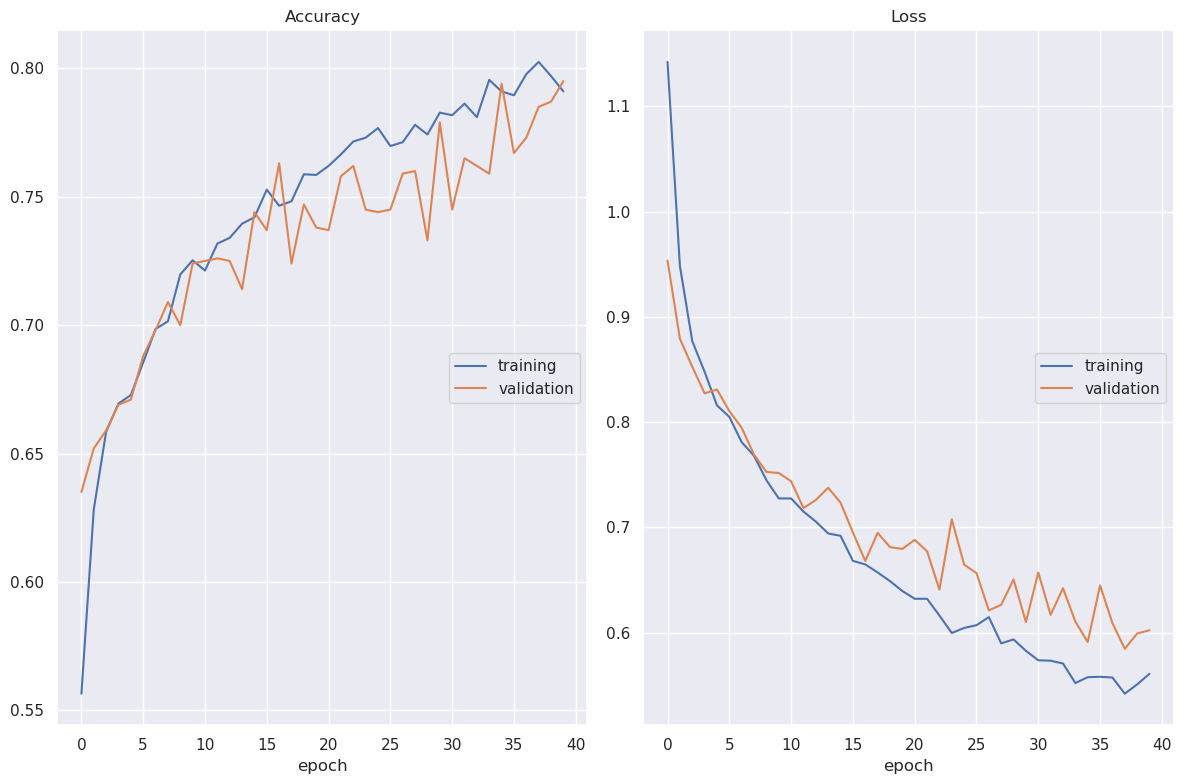

Accuracy
	training         	 (min:    0.557, max:    0.803, cur:    0.791)
	validation       	 (min:    0.635, max:    0.795, cur:    0.795)
Loss
	training         	 (min:    0.542, max:    1.142, cur:    0.561)
	validation       	 (min:    0.585, max:    0.954, cur:    0.602)
4000/4000 [==============================] - 1s 157us/sample - loss: 0.5610 - acc: 0.7910 - val_loss: 0.6024 - val_acc: 0.7950


In [350]:
#print the validation accuracy and loss after each epoch
plot_losses = PlotLossesKerasTF()

best_mlp_model.fit(X_train, y_train, 
                   validation_data=(X_test, y_test),
                   callbacks=[PlotLossesKerasTF()], verbose=1)

In [351]:
predictions = best_mlp_model.predict(X_test)